In [75]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join

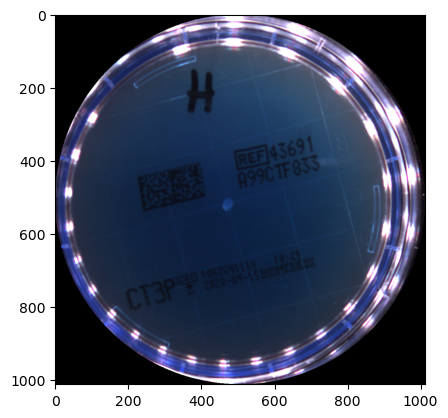

In [110]:
#get a list of files in the folder with pics
folder_path = os.path.abspath('.')+'/Smpl_Im'
processed_path = os.path.abspath('.')+'/Smpl_Thresh'
file_names = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
file = file_names[0]
new_name = os.path.join(processed_path, file)
image = cv2.imread(folder_path+'/'+file)
plt.imshow(image)
plt.show()

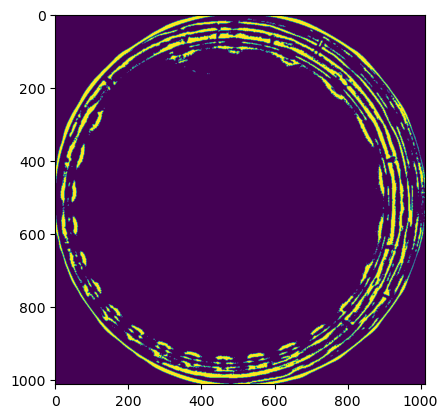

In [113]:
th = cv2.adaptiveThreshold(image[:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,41,12)
th = cv2.bitwise_not(th)
plt.imshow(th)
plt.show()